In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
RNA_TPM = pd.read_csv('/public/home/liujunwu/workdir/DataSets/Kaggle/GDSC/rnaseq_merged_rsem_tpm.dropNA.imputeKNN.csv',sep=',',index_col=0)
RNA_TPM.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
MEC-1,3.8530,1.8156,0.0000,0.2388,0.0000,0.0000,0.0,0.0,0.0000,0.0000,...,6.9332,0.7655,1.9561,2.8992,0.8953,0.0000,1.9260,4.1562,3.0959,3.6792
NBsusSR,4.5059,2.3868,0.0286,0.5753,0.3448,0.4751,0.0,0.0,0.0144,0.1890,...,6.1613,1.7137,2.6803,5.6156,0.8480,0.0000,3.7388,5.2687,4.3519,5.4182
M14,3.9736,3.1408,0.0144,4.1326,0.4114,0.0000,0.0,0.0,0.0000,0.0841,...,7.6785,1.0909,2.1010,4.0488,2.6369,0.0976,3.7148,6.9590,4.3561,5.5622
MDA-MB-134-VI,5.7038,3.3334,0.0566,0.5261,1.4489,0.4114,0.0,0.0,0.0426,0.0000,...,7.0300,1.7093,2.2570,4.3111,1.0909,0.0000,2.4463,4.0009,3.3813,4.2434
MCC26,3.9069,2.5801,0.0426,5.6562,0.5656,0.1506,0.0,0.0,0.0286,0.1635,...,6.4819,1.4005,2.3533,3.9551,2.9800,0.0000,3.6334,8.5417,3.5211,5.1839


In [14]:
drug_data.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,LN_IC50,AUC,Z_SCORE,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,...,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
92319,683667,PFSK-1,MB,1558,2.895920,0.917666,-0.203556,Y,Y,Y,...,medulloblastoma,MB,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling
92320,684052,A673,UNCLASSIFIED,1558,4.972644,0.984151,1.110270,Y,Y,Y,...,rhabdomyosarcoma,NaN,MSS/MSI-L,D/F12,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling
92321,684057,ES5,UNCLASSIFIED,1558,3.235329,0.937947,0.011168,Y,Y,Y,...,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling
92322,684059,ES7,UNCLASSIFIED,1558,2.437388,0.894294,-0.493643,Y,Y,Y,...,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling
92323,684062,EW-11,UNCLASSIFIED,1558,4.443034,0.960904,0.775215,Y,Y,Y,...,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling


(966, 23)
940


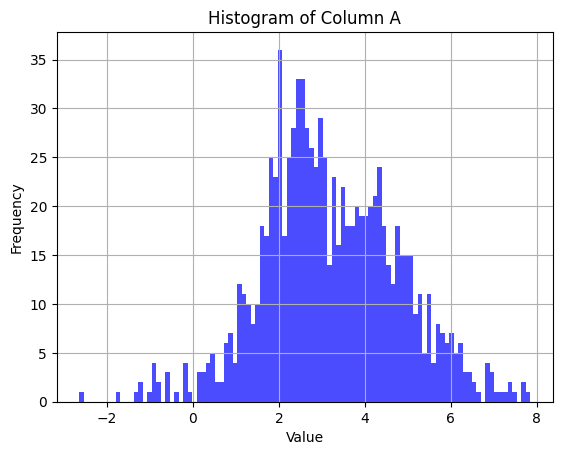

In [4]:
## 指定某选定的药物
drug = 'Lapatinib'
Data = pd.read_csv('/public/home/liujunwu/workdir/DataSets/Kaggle/GDSC/final_data.csv',sep='\t')

drug_data = Data[Data['DRUG_NAME'] == drug]
print (drug_data.shape)
## 获得有表达量的细胞系
common_cell_line = list(set(RNA_TPM.index) & set(drug_data['CELL_LINE_NAME'].values))
print (len(common_cell_line))
## 查看该drug的Ln_IC50分布
drug_data = drug_data[drug_data['CELL_LINE_NAME'].isin(common_cell_line)]
import matplotlib.pyplot as plt

# 绘制列 'A' 的直方图
plt.hist(drug_data['LN_IC50'], bins=100, color='blue', alpha=0.7)  # bins 参数控制直方图的柱数
plt.title('Histogram of Column A')  # 添加标题
plt.xlabel('Value')  # 添加 x 轴标签
plt.ylabel('Frequency')  # 添加 y 轴标签
plt.grid(True)  # 添加网格线
plt.show()

In [ ]:
## 获得具有表达量信息的细胞系
drug_cell_line_tpm = RNA_TPM.loc[common_cell_line]
drug_cell_line_tpm = drug_cell_line_tpm.loc[drug_data['CELL_LINE_NAME']]
print (drug_cell_line_tpm.shape)
drug_cell_line_tpm.head()

In [ ]:
## 读取细胞系Reactome ssGSEA score ES值
#Total_GSEA_ES = pd.read_csv('/public/home/liujunwu/workdir/DataSets/Kaggle/GDSC/GSEA/Total_CellLine.gseapy.gene_set.ssgsea.report.csv',sep=',',header=None)
#Total_GSEA_ES.columns = ['Name','Term','ES','NES']
Total_GSEA_ES = Total_GSEA_ES[Total_GSEA_ES['Name'].isin(common_cell_line)]
print (Total_GSEA_ES.shape)
Total_GSEA_ES = Total_GSEA_ES.dropna(subset=['ES'])
print (Total_GSEA_ES.shape)
Total_GSEA_ES.head()

(2455280, 4)
(2429900, 4)


,Name,Term,ES,NES
3,G-MEL,R-HSA-5682294,-18201.499725,-0.500014
5,DiFi,R-HSA-5682294,-18200.499698,-0.499986
6,STS-0421,R-HSA-5678520,-18200.499698,-0.499986
7,TK10,R-HSA-162585,18199.499671,0.499959
8,HOP-92,R-HSA-5678520,-18199.499671,-0.499959


In [13]:
## 长表变宽表，以细胞系为样本，pathway为特征的矩阵
Total_GSEA_ES_wide = Total_GSEA_ES.pivot(index='Name', columns='Term', values='ES')
print (Total_GSEA_ES_wide.shape)
Total_GSEA_ES_wide.head()

(940, 2585)


Term,R-HSA-1059683,R-HSA-109581,R-HSA-109582,R-HSA-109606,R-HSA-109703,R-HSA-109704,R-HSA-110056,R-HSA-110312,R-HSA-110313,R-HSA-110314,...,R-HSA-983169,R-HSA-983170,R-HSA-983189,R-HSA-983231,R-HSA-9833576,R-HSA-983695,R-HSA-983705,R-HSA-983712,R-HSA-991365,R-HSA-997272
Name,,,,,,,,,,,,,,,,,,,,,
22RV1,7732.909951,12376.723690,4257.920739,12319.756551,13480.002862,4023.027357,9790.782740,16522.229037,14955.578641,15967.906547,...,11172.064194,11288.288729,10133.224292,8066.637462,12432.354750,-7227.945920,3337.584257,6145.901952,3091.624468,2678.151244
23132-87,9721.973550,12828.751336,4685.447288,13053.604875,11179.491184,2976.607518,11127.852931,14983.272883,13895.133119,14744.965989,...,11557.522051,14619.852600,8465.856613,7771.393669,13464.027681,-6328.032650,3880.878952,5403.621695,3137.979656,2222.944374
42-MG-BA,13594.351318,12824.742556,5634.814476,12915.229042,8202.384882,3251.173949,13660.605785,15553.611870,14442.758584,15173.796325,...,11747.647660,14877.553132,9640.578489,7744.878231,13133.609449,-6033.463392,4098.399199,5180.003999,5875.335155,5370.032944
451Lu,12324.115343,12893.069310,4108.830452,13566.120781,14597.554717,2470.146434,13363.113893,15868.891278,14316.099245,15331.088285,...,11272.242975,13751.177443,8633.388099,8079.731227,5671.525930,-7265.260857,3079.546965,6039.756737,4738.454993,4191.458288
5637,13176.451985,13698.684359,5268.630451,13976.001893,12073.985946,3569.573815,13768.524954,15432.781328,14445.785724,15244.902453,...,11754.617201,14514.676910,9213.191394,7956.917962,10323.342253,-6439.113478,4128.673427,5695.071961,5431.063510,4848.430363


In [33]:
from scipy.stats import zscore
Total_GSEA_ES_wide = Total_GSEA_ES_wide.apply(zscore, axis=1)
Total_GSEA_ES_wide.head()

Term,R-HSA-1059683,R-HSA-109581,R-HSA-109582,R-HSA-109606,R-HSA-109703,R-HSA-109704,R-HSA-110056,R-HSA-110312,R-HSA-110313,R-HSA-110314,...,R-HSA-983169,R-HSA-983170,R-HSA-983189,R-HSA-983231,R-HSA-9833576,R-HSA-983695,R-HSA-983705,R-HSA-983712,R-HSA-991365,R-HSA-997272
Name,,,,,,,,,,,,,,,,,,,,,
22RV1,-0.159697,0.574069,-0.708778,0.565067,0.748397,-0.745893,0.165466,1.229097,0.981552,1.141509,...,0.383721,0.402086,0.219575,-0.106965,0.582859,-2.523652,-0.854200,-0.410459,-0.893064,-0.958396
23132-87,0.164629,0.633911,-0.596144,0.667876,0.384789,-0.854267,0.376989,0.959354,0.794990,0.923358,...,0.441891,0.904459,-0.025109,-0.130009,0.729871,-2.259744,-0.717675,-0.487663,-0.829891,-0.968108
42-MG-BA,0.721110,0.605583,-0.473702,0.619166,-0.088282,-0.831511,0.731055,1.015215,0.848465,0.958201,...,0.443900,0.913732,0.127606,-0.156959,0.651947,-2.225234,-0.704334,-0.541973,-0.437597,-0.513448
451Lu,0.575319,0.655390,-0.580847,0.750111,0.895268,-0.811464,0.721541,1.074188,0.855658,0.998501,...,0.427286,0.776155,0.055910,-0.022008,-0.360923,-2.181562,-0.725701,-0.309101,-0.492237,-0.569218
5637,0.641839,0.721401,-0.562924,0.763651,0.473877,-0.821777,0.732042,0.985593,0.835223,0.956969,...,0.425221,0.845719,0.038033,-0.153362,0.207165,-2.346609,-0.736598,-0.497956,-0.538178,-0.626942


In [34]:
from sklearn.decomposition import PCA
import seaborn as sns

# 假设 X 是特征矩阵
pca = PCA(n_components=2)  # 选择保留解释度到95%的特征向量
X_pca = pca.fit_transform(Total_GSEA_ES_wide.values)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = drug_data[drug_data['CELL_LINE_NAME'].isin(Total_GSEA_ES_wide.index)]['TCGA_DESC'].values


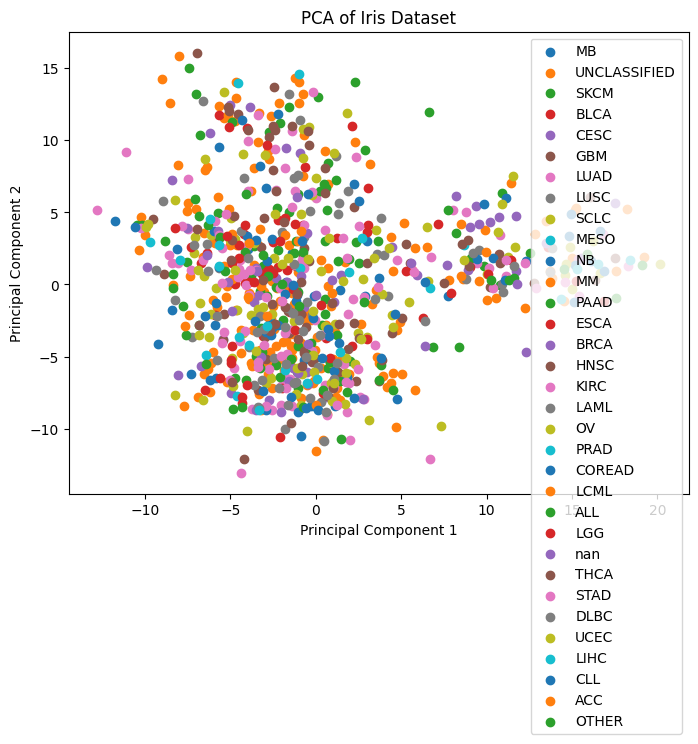

In [ ]:
# 绘制 PCA 结果
plt.figure(figsize=(8, 6))
for i in pca_df['Target'].unique():
    plt.scatter(
        pca_df['PC1'][pca_df['Target'] == i],
        pca_df['PC2'][pca_df['Target'] == i],
        label=i
    )

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of CellLine ES score')
plt.show()

In [ ]:
def classify_ln_ic50(value):
    if value < 2.36:
        return "High_sensitivity"
    elif 2.36 <= value <= 5.26:
        return "Middle_sensitivity"
    else:
        return "Low_sensitivity"
label_mapping = {'High_sensitivity': 0, 'Middle_sensitivity': 1, 'Low_sensitivity': 2}
drug_data['classify']= drug_data['LN_IC50'].apply(lambda x: classify_ln_ic50(x))


classify            TCGA_DESC   
Middle_sensitivity  UNCLASSIFIED    115
High_sensitivity    UNCLASSIFIED     47
Middle_sensitivity  SCLC             42
                    SKCM             35
                    LUAD             32
                                   ... 
Low_sensitivity     MM                1
                    KIRC              1
High_sensitivity    MB                1
                    THCA              1
Middle_sensitivity  OTHER             1
Name: count, Length: 79, dtype: int64

In [46]:
a = pd.DataFrame(drug_data[['TCGA_DESC','classify']].value_counts())
a.to_csv('output.txt',sep='\t')

In [ ]:
## 使用 Random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# 假设 X 是特征矩阵
pca = PCA(n_components=0.95)  # 选择保留解释度到95%的特征向量
X_pca = pca.fit_transform(drug_cell_line_tpm.values)

print (len(pca.components_))
# 
# # 查看方差解释率
# explained_variance = pca.explained_variance_ratio_
# print("方差解释率:", explained_variance)

# # 累积方差解释率
# cumulative_variance = np.cumsum(explained_variance)
# print("累积方差解释率:", cumulative_variance)

In [ ]:
len(important_features)

In [ ]:
# 将系数转换为 DataFrame，便于查看
components_df = pd.DataFrame(pca.components_, columns=drug_cell_line_tpm.columns)
print("主成分的系数 DataFrame:\n", components_df)

# 选择对主成分贡献较大的特征
threshold_coeff = 0.05
important_features = []
n_components = len(pca.components_)
for i in range(n_components):
    component = components_df.iloc[i]
    important_features.extend(component[abs(component) > threshold_coeff].index.tolist())

# 去重
important_features = list(set(important_features))
print (len(important_features))
print("选择的重要特征:", important_features[0:10])

In [ ]:
print (X_train.head())

In [ ]:
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print (df.head())
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df)
plt.title('PCA of TPM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [ ]:
# 离散Ln_IC50回归预测
y= drug_data['LN_IC50'].values
X = drug_cell_line_tpm.loc[:,important_features].values
X = StandardScaler().fit_transform(X)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_RandomForest = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RandomForest)
r2 = r2_score(y_test, y_pred_RandomForest)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

In [49]:
print (drug_data.shape)
print (Total_GSEA_ES_wide.shape)

(940, 24)
(940, 2585)


In [52]:
drug_data.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,LN_IC50,AUC,Z_SCORE,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,...,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,classify
92319,683667,PFSK-1,MB,1558,2.895920,0.917666,-0.203556,Y,Y,Y,...,MB,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling,Middle_sensitivity
92320,684052,A673,UNCLASSIFIED,1558,4.972644,0.984151,1.110270,Y,Y,Y,...,NaN,MSS/MSI-L,D/F12,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling,Middle_sensitivity
92321,684057,ES5,UNCLASSIFIED,1558,3.235329,0.937947,0.011168,Y,Y,Y,...,NaN,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling,Middle_sensitivity
92322,684059,ES7,UNCLASSIFIED,1558,2.437388,0.894294,-0.493643,Y,Y,Y,...,NaN,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling,Middle_sensitivity
92323,684062,EW-11,UNCLASSIFIED,1558,4.443034,0.960904,0.775215,Y,Y,Y,...,NaN,MSS/MSI-L,R,Adherent,SANGER,Lapatinib,"Tykerb, Tyverb","EGFR, ERBB2",EGFR signaling,Middle_sensitivity


In [64]:
Total_GSEA_ES_wide.loc[drug_data['CELL_LINE_NAME'].values,:].head()

Term,R-HSA-1059683,R-HSA-109581,R-HSA-109582,R-HSA-109606,R-HSA-109703,R-HSA-109704,R-HSA-110056,R-HSA-110312,R-HSA-110313,R-HSA-110314,...,R-HSA-983169,R-HSA-983170,R-HSA-983189,R-HSA-983231,R-HSA-9833576,R-HSA-983695,R-HSA-983705,R-HSA-983712,R-HSA-991365,R-HSA-997272
Name,,,,,,,,,,,,,,,,,,,,,
PFSK-1,0.538182,0.520008,-0.593881,0.673072,1.043707,-0.636896,0.626690,1.041452,0.877102,0.973620,...,0.403678,0.647781,0.104545,-0.052189,0.673756,-2.490508,-0.889289,-0.382698,-0.401722,-0.350513
A673,0.317170,0.649369,-0.577620,0.598549,0.488429,-0.627568,0.549350,1.168684,0.977515,1.080131,...,0.400064,0.703474,0.280797,-0.169952,1.054186,-2.165728,-0.635839,-0.440169,-0.600726,-0.609022
ES5,0.358334,0.586314,-0.661863,0.632319,0.703673,-0.730516,0.514095,1.132442,0.806981,0.994282,...,0.431478,0.669232,0.254299,-0.121548,0.905332,-2.530077,-0.944512,-0.287156,-0.510313,-0.431926
ES7,0.646967,0.620330,-0.638855,0.650262,0.635494,-0.611624,0.708537,0.993011,0.819991,0.898855,...,0.432533,0.820132,0.141178,-0.171129,0.878586,-2.453739,-0.853818,-0.312573,-0.804798,-0.871593
EW-11,0.088128,0.607811,-0.723588,0.623882,0.808551,-0.709519,0.218317,1.147159,0.860702,1.031395,...,0.414666,0.545817,0.264046,-0.165956,0.948286,-2.556171,-0.907010,-0.328717,-0.690801,-0.636192


In [70]:
sorted_data = sorted(drug_data['LN_IC50'].values)

# 计算前5%的位置
n = len(sorted_data)
top_5_percent_index = int(n * 0.05) - 1  # 减1是因为索引从0开始
top_95_percent_index = int(n * 0.95) - 1 
# 获取前5%的值
top_5_percent_value = sorted_data[top_5_percent_index]
top_95_percent_value = sorted_data[top_95_percent_index]
print (top_5_percent_value,top_95_percent_value)

0.826646 5.910701


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 将LN_IC50化为敏感，中等和不敏感三个分类
# 定义分类函数
def classify_ln_ic50(value):
    if value < 1:
        return "High_sensitivity"
    elif 1 <= value <= 5.91:
        return "Middle_sensitivity"
    else:
        return "Low_sensitivity"
label_mapping = {'High_sensitivity': 0, 'Middle_sensitivity': 1, 'Low_sensitivity': 2}
#drug_data_match = drug_data_match[drug_data['CELL_LINE_NAME']]
y= drug_data['LN_IC50'].apply(lambda x: classify_ln_ic50(x))
y_lab = y.map(label_mapping).values

X = Total_GSEA_ES_wide.loc[drug_data['CELL_LINE_NAME'].values,:]
#X = drug_cell_line_tpm
#X = drug_cell_line_tpm.loc[:,important_features]
#X = StandardScaler().fit_transform(X)
#X = components_df.loc[:,important_features].values

# 只取高敏感和低敏感的数据进行分类
indices = [index for index, value in enumerate(y_lab) if value in (0, 2)]
y_lab_new = [y_lab[index] for index in indices]
X = X.iloc[indices]
#X = X.loc[:,important_features]
#X = StandardScaler().fit_transform(X)
print (X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y_lab_new, test_size=0.2, random_state=42)

#
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
#
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.2f}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred, target_names=['高敏感性','低敏感性']))

# 打印混淆矩阵
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

(103, 2585)
准确率: 0.95
分类报告:
              precision    recall  f1-score   support

        高敏感性       0.90      1.00      0.95         9
        低敏感性       1.00      0.92      0.96        12

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

混淆矩阵:
[[ 9  0]
 [ 1 11]]


In [87]:
Total_GSEA_ES_wide_new = Total_GSEA_ES_wide.loc[drug_data['CELL_LINE_NAME'].values,:]
Total_GSEA_ES_wide_new['classify'] = y.values
#print (Total_GSEA_ES_wide_new.head())
print (Total_GSEA_ES_wide_new[Total_GSEA_ES_wide_new['classify'].isin(['High_sensitivity','Low_sensitivity'])][['R-HSA-8853334','R-HSA-2024101','classify']].head(40))

Term            R-HSA-8853334  R-HSA-2024101          classify
Name                                                          
COLO-829            -0.811093       0.178831   Low_sensitivity
TCCSUP              -1.048683       0.130129   Low_sensitivity
Calu-3               0.536699      -0.506968  High_sensitivity
NCI-H1623           -0.659664      -0.289364  High_sensitivity
NCI-H1648            0.934696      -0.413175  High_sensitivity
NCI-H2170            0.229769      -0.189751  High_sensitivity
NCI-H2347           -0.243993      -0.486938   Low_sensitivity
NCI-H2405           -0.027617       0.003541   Low_sensitivity
NCI-H2227           -0.844993       0.042276   Low_sensitivity
NCI-H345            -0.980966      -0.476430   Low_sensitivity
VA-ES-BJ            -0.390383       0.262651   Low_sensitivity
SK-N-AS             -0.969587       0.255709   Low_sensitivity
SW756                0.010509       0.030893   Low_sensitivity
NCI-H1355           -0.570575      -0.173958   Low_sens

In [78]:
import shap

# 创建解释器
explainer = shap.TreeExplainer(rf_classifier)

# 计算SHAP值
shap_values = explainer.shap_values(X_test)

# 查看结构
print(f"SHAP值类型: {type(shap_values)}")  # list
print(f"SHAP值长度: {len(shap_values)}")   # 3 (对应3个类别)
print(f"每个类别的SHAP值形状: {shap_values[0].shape}")  # (n_samples, n_features)

SHAP值类型: <class 'numpy.ndarray'>
SHAP值长度: 21
每个类别的SHAP值形状: (2585, 2)


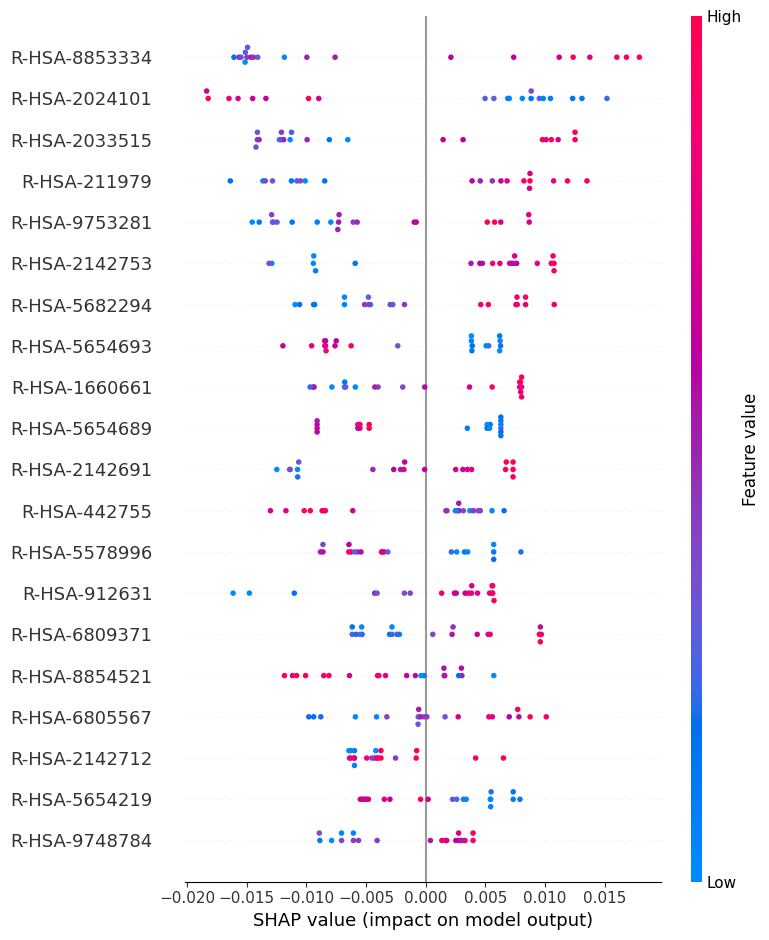

In [79]:
# SHAP分析
#explainer = shap.TreeExplainer(rf_classifier)
#shap_values = explainer.shap_values(X_test)

# 可视化
shap.summary_plot(shap_values[:,:,0], X_test)  # 正类的SHAP值

In [80]:
Total_GSEA_ES_wide[['R-HSA-8853334','R-HSA-2024101']].head()

Term,R-HSA-8853334,R-HSA-2024101
Name,,
22RV1,0.805024,-0.288994
23132-87,-0.141667,-0.402288
42-MG-BA,-0.361365,0.416873
451Lu,-1.060018,0.372463
5637,-0.787265,-0.237897


In [ ]:
# 为每个类别创建summary plot
for i, class_name in enumerate(rf_classifier.classes_):
    print(f"\n类别 {class_name} 的特征重要性:")
    shap.summary_plot(shap_values[i], X_test, plot_type="bar", show=False)
    plt.title(f"Feature Importance for {class_name}")
    plt.show()

In [ ]:
# 查看单个样本的 SHAP 值
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0,:,:], X_test.iloc[0, :])

In [ ]:
## XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np

xgb_model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
param_dist = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [0.5, 1, 1.5]  # L2 regularization
}
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Number of random combinations
                                   scoring='neg_root_mean_squared_error',
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters Found:", random_search.best_params_)
print(f"Tuned R² Score: {r2:.4f}")
print(f"Tuned RMSE: {rmse:.4f}")
print(f"Tuned MAE: {mae:.4f}")

In [ ]:
## 使用MLP进行预测


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
## 使用CNN进行预测
y = drug_data['LN_IC50'].values
#X = drug_cell_line_tpm.values
X = drug_cell_line_tpm.loc[:,important_features].values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 转换为 PyTorch 张量
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # 添加通道维度
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # 添加通道维度
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 创建 DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5, stride=2, padding=3)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=3)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32512, 64)  # 根据卷积层输出调整
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# 初始化模型、损失函数和优化器
model = CNNRegressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1, 1))
        loss.backward()
        optimizer.step()
        
        if batch_idx % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

# 评估模型
model.eval()
with torch.no_grad():
    predictions = []
    targets = []
    for data, target in test_loader:
        output = model(data)
        predictions.extend(output.view(-1).numpy())
        targets.extend(target.numpy())

# 计算评估指标
mse = mean_squared_error(targets, predictions)
r2 = r2_score(targets, predictions)
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

In [ ]:
import shap
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 加载数据
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP分析
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 可视化
shap.summary_plot(shap_values[:,:,1], X_test)  # 正类的SHAP值
#shap.force_plot(explainer.expected_value[1], shap_values[:,:,1], X_test.iloc[0,:])

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_test)  # 正类的SHAP值


In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[0,:,1], X_test.iloc[0,:])

In [ ]:
print (shap.__version__)